In [1]:
import mysql.connector
import pandas as pd
#Connection to server
con= mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="B!l@m@nur0y",
    database="student")

In [5]:
student_data=pd.read_sql_query("Select * from studmarks", con)
student_data
student_data.head(10)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,Annu,F,05-04-88,45,87,52,89,55,89,87,52
1,Farha,F,12-08-90,55,63,89,75,78,75,63,89
2,Jennifer,F,02-09-89,58,96,78,46,96,77,83,53
3,Jessica,F,12-08-90,78,96,86,63,54,89,75,45
4,John,M,05-04-88,55,45,56,87,21,52,89,65
5,Mukesh,M,02-09-89,96,46,77,83,58,83,46,77
6,pooja,F,04-05-87,55,64,61,58,75,58,64,61
7,Ramesh,M,25-05-89,25,54,89,76,95,87,56,74
8,Ritesh,M,25-05-89,54,76,87,56,25,56,76,87
9,Suresh,M,04-05-87,75,96,78,64,90,61,58,2


In [6]:
#data analysis and wrangling
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
#extracting the general information from the dataset
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [8]:
#checking if any null values present in the dataset
student_data.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [9]:
student_data.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


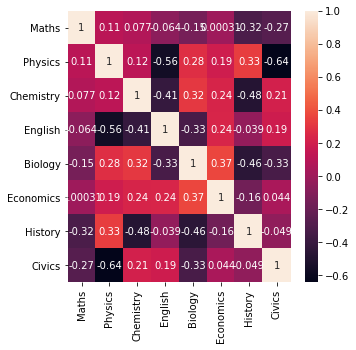

In [10]:
#checking for the correlation
corr_hmap=student_data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_hmap,annot=True)

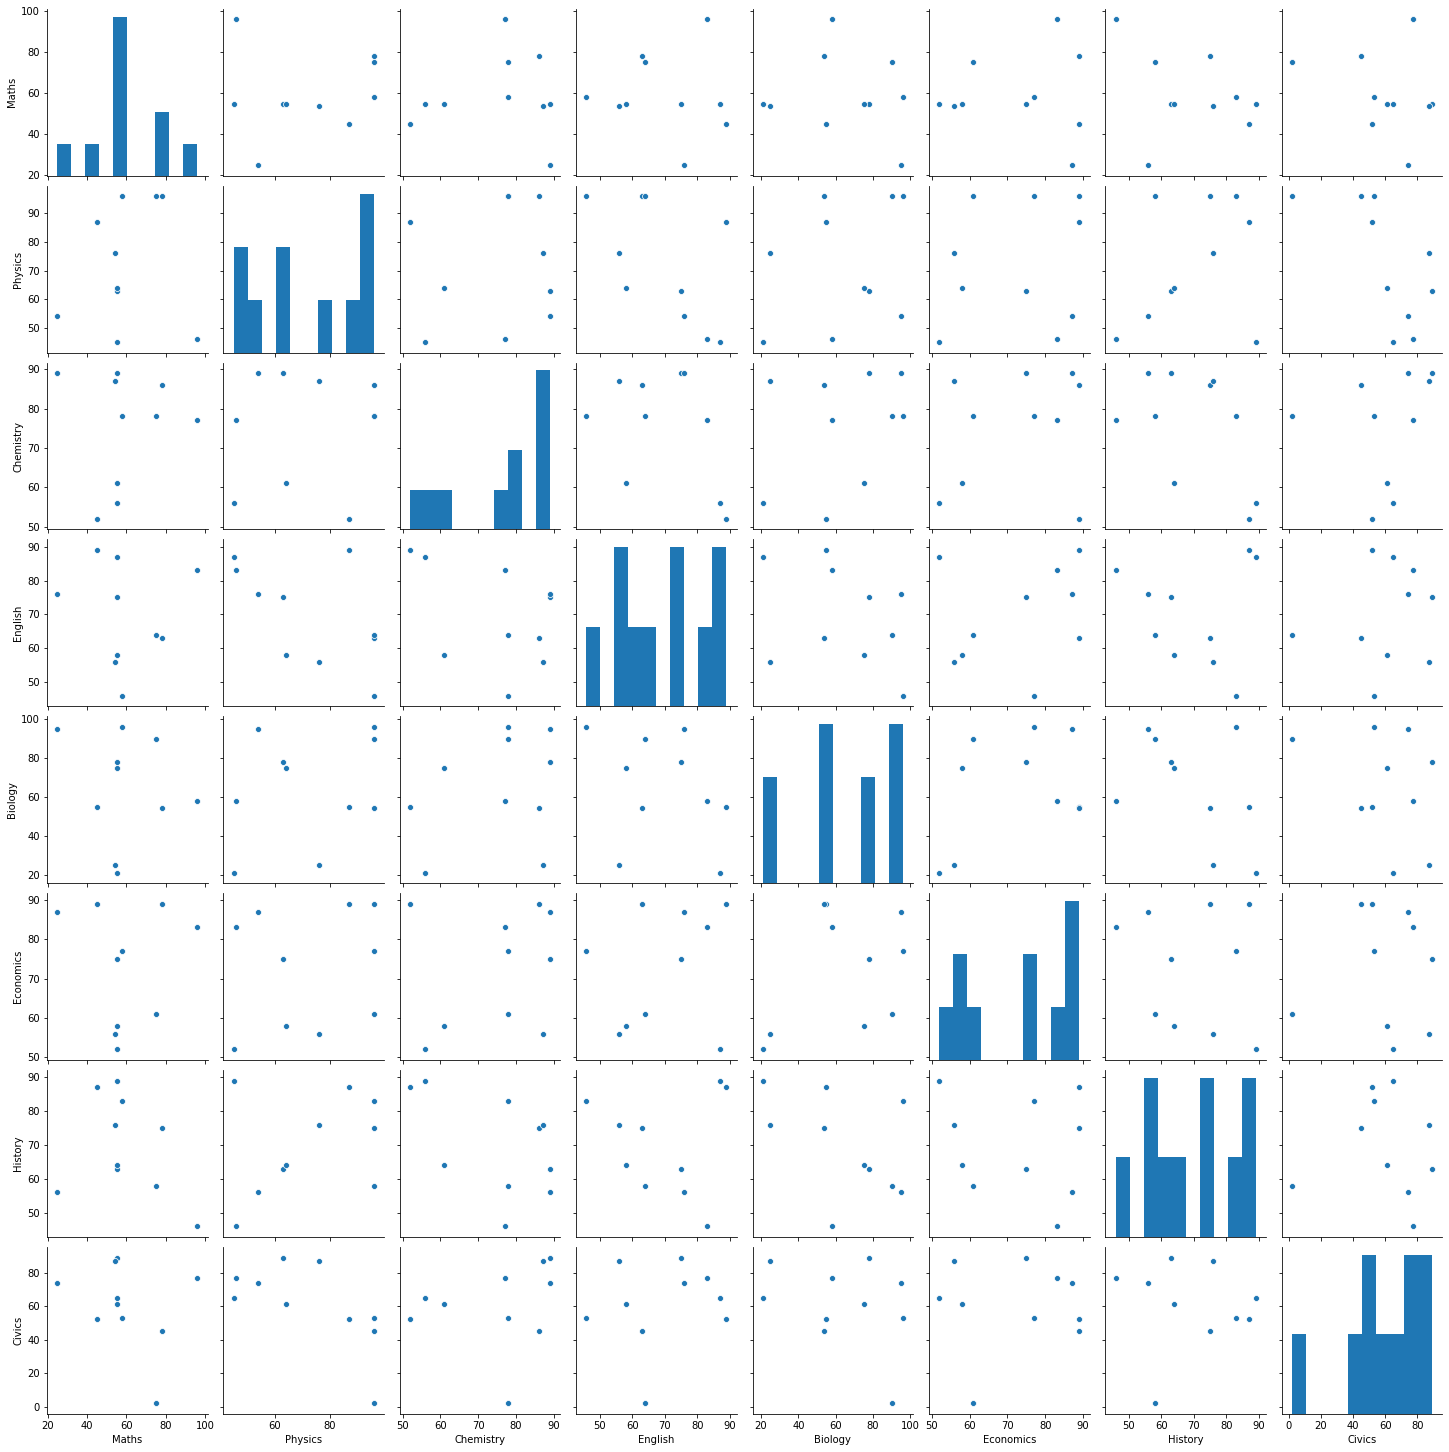

In [11]:
#multiplot visualization
sns.pairplot(student_data)

In [18]:
student_data.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

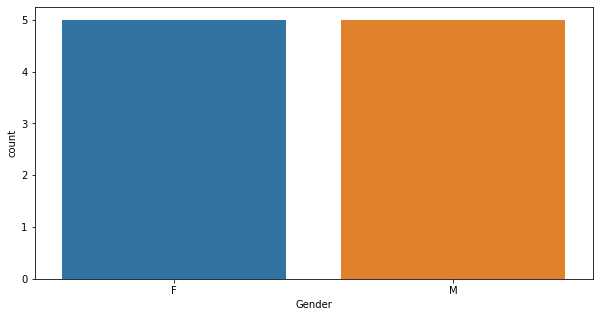

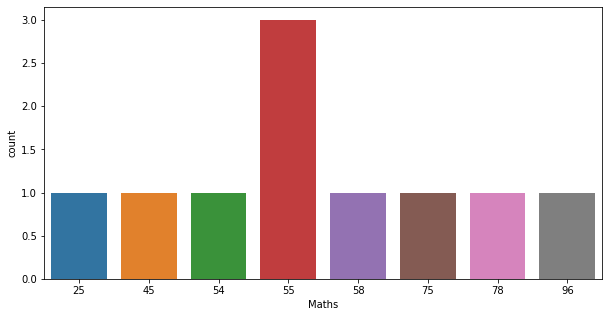

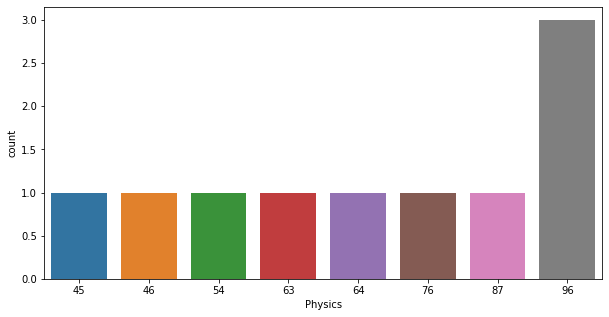

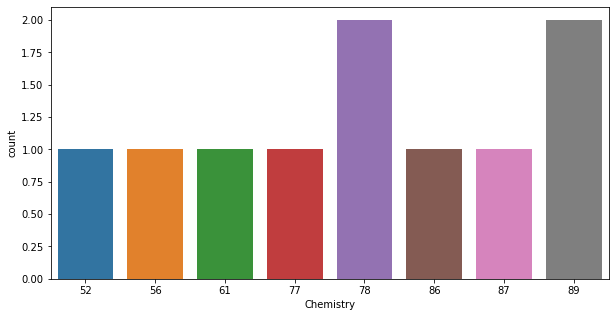

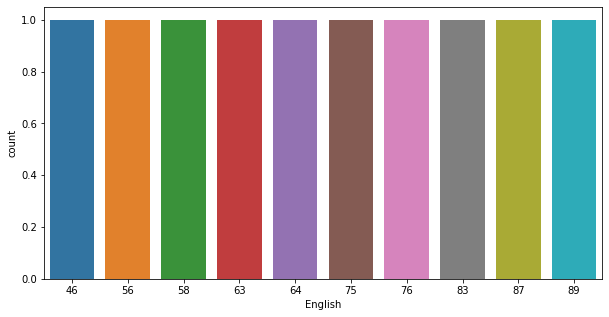

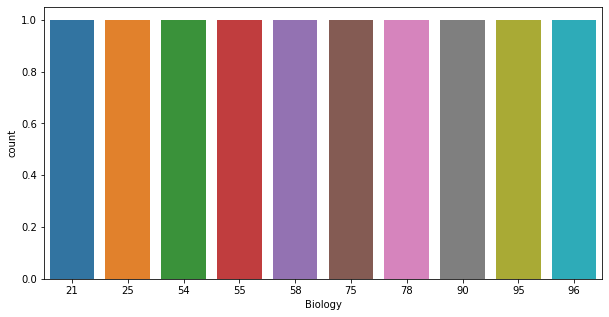

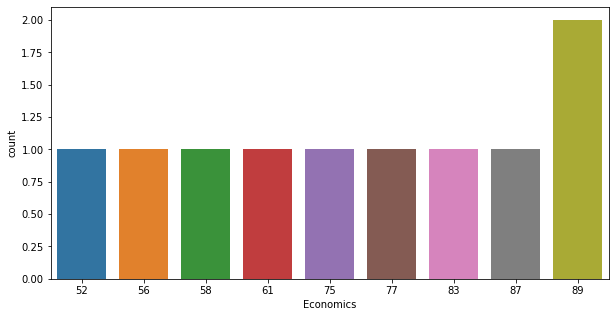

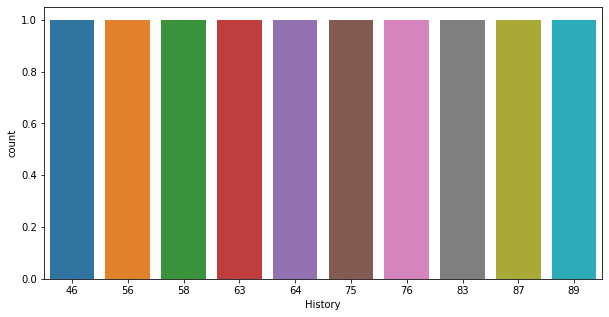

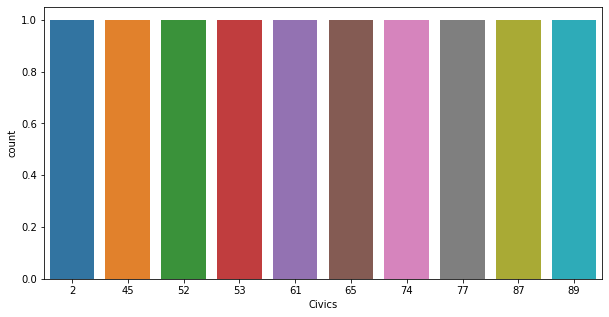

In [21]:
#printing different plot w.r.t survived column
data_columns=['Gender','Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics']
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(10,5))
    sns.countplot(data=student_data,x=data_columns[i])

Maths           AxesSubplot(0.125,0.536818;0.168478x0.343182)
Physics      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Chemistry    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
English      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Biology            AxesSubplot(0.125,0.125;0.168478x0.343182)
Economics       AxesSubplot(0.327174,0.125;0.168478x0.343182)
History         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Civics          AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

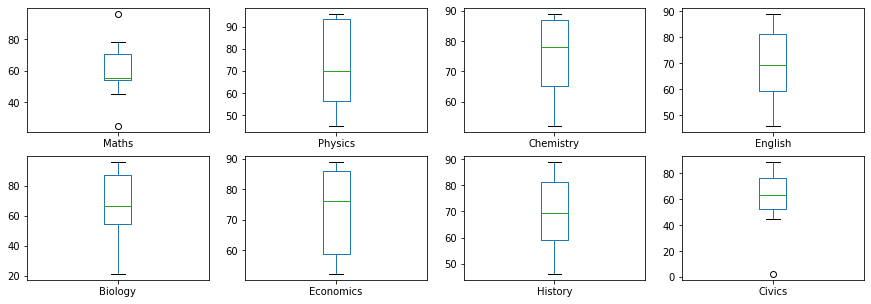

In [23]:
#checking for the outliers
student_data.plot(kind='box',subplots=True,layout=(2,4),figsize=(15,5))

In [25]:
#checking the skewness before removing the outliers
student_data.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

In [30]:
#dropping off the columns those are not required
student_data.drop(['Name','DOB','Gender'],axis=1,inplace=True)

In [32]:
#removing outliers
from scipy.stats import zscore 
z_score=np.abs(zscore(student_data))
print(student_data.shape)
student_data_final=student_data.loc[(z_score<3).all(axis=1)]
print(student_data_final.shape)

(10, 8)
(10, 8)
